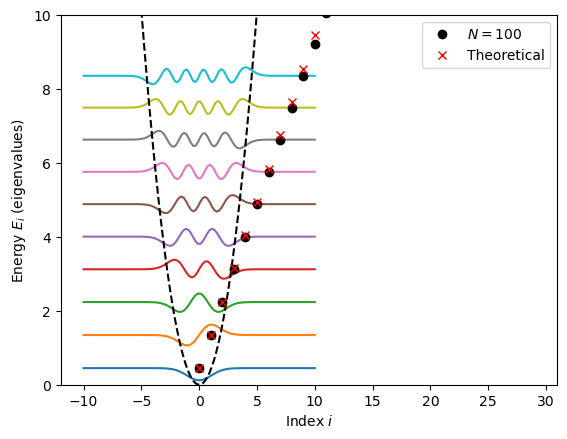

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def ham(x_pos, pot_array):
    # Arguments: 
    # * x_pos: values of the position space
    # * pot_array: potential values at each position in x_pos
    # Output:
    # * ham_matrix: a `N x N` matrix of the Hamiltonian

    N = len(x_pos)
    dx = x_pos[1] - x_pos[0]
    pot = np.diag(pot_array)
    kin = -((np.eye(N, N, k=+1) + np.eye(N, N, k=-1) - 2*np.eye(N, N, k=0))/((x_pos[1] - x_pos[0])**2))/2
    ham_matrix = pot + kin
    return ham_matrix

## For example, if my space is from -10<x<10 and my potential is V(x) = 0.5*(x^2):
N = 100
omega = 0.9
x_pos = np.linspace(-10, 10, N)
harmonic_pot = 0.5*(omega**2)*(x_pos**2)

harmonic_setup = ham(x_pos, harmonic_pot)
## where the matrix effectively depends on the potential I want to use

# Read the following:
# * `np.linalg.eigh`: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
ho_eigvals, ho_eigvecs = np.linalg.eigh(harmonic_setup)

for i in range(10):
    plt.plot(x_pos, ho_eigvals[i] + ho_eigvecs[:,i])

plt.plot(x_pos, harmonic_pot, "k--")
plt.ylim(0, 10)

plt.plot(ho_eigvals[:30], "ko", label = "$N = 100$")
plt.plot(omega*(np.arange(30) + 0.5), "rx", label="Theoretical")
plt.xlabel(r"Index $i$")
plt.ylabel(r"Energy $E_i$ (eigenvalues)")
plt.legend()

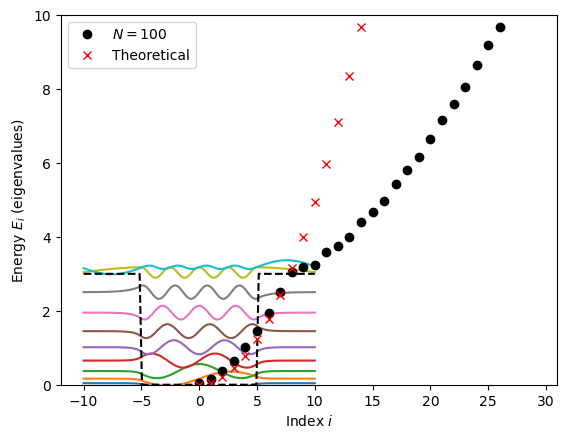

In [22]:
# square well potential

import numpy as np
import matplotlib.pyplot as plt

def ham(x_pos, pot_array):
    # Arguments: 
    # * x_pos: values of the position space
    # * pot_array: potential values at each position in x_pos
    # Output:
    # * ham_matrix: a `N x N` matrix of the Hamiltonian

    N = len(x_pos)
    dx = x_pos[1] - x_pos[0]
    pot = np.diag(pot_array)
    kin = -((np.eye(N, N, k=+1) + np.eye(N, N, k=-1) - 2*np.eye(N, N, k=0))/((x_pos[1] - x_pos[0])**2))/2
    ham_matrix = pot + kin
    return ham_matrix

N = 100
V_0 = 3
x_pos = np.linspace(-10, 10, N)

W = 10 #Well width
sqw_pot = V_0 * ((x_pos > W/2) + (x_pos < -W/2))

sqw_setup = ham(x_pos, sqw_pot)
ho_eigvals, ho_eigvecs = np.linalg.eigh(sqw_setup)

for i in range(10):
    plt.plot(x_pos, ho_eigvals[i] + ho_eigvecs[:,i])

plt.plot(x_pos, sqw_pot, "k--")
plt.ylim(0, 10)

plt.plot(ho_eigvals[:30], "ko", label = "$N = 100$")
plt.plot(0.5*((np.pi**2)/(W**2)*(np.arange(30)**2)), "rx", label="Theoretical")
plt.xlabel(r"Index $i$")
plt.ylabel(r"Energy $E_i$ (eigenvalues)")
plt.legend()

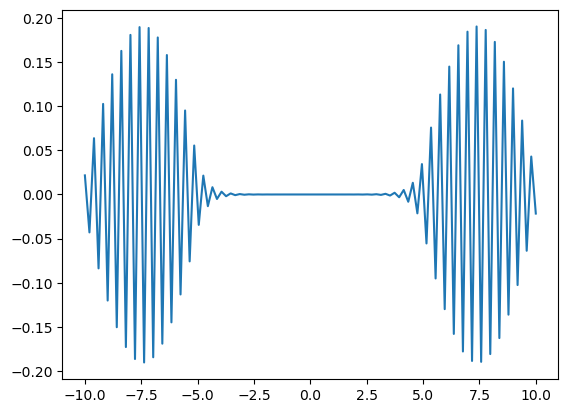

In [35]:
plt.plot (x_pos, ho_eigvecs[:,99])

/tmp/ipykernel_116674/1090679629.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


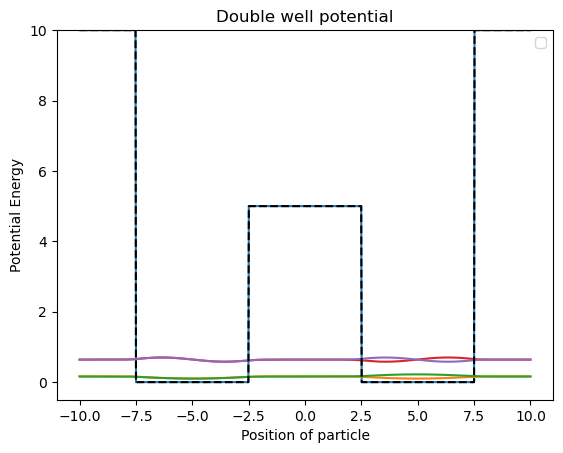

In [120]:
#Exercise

import numpy as np
import matplotlib.pyplot as plt

V_0 = 5 #height of well
V_1 = 10
L = 5 #width of well
a = 5 #separation of well
N = 1000
x_pos = np.linspace(-10, 10, N)

dbw_pot = (V_0 * ((x_pos < (a/2)) * (x_pos > (-a/2)))) + (V_1* ((x_pos < -L-a/2) + (x_pos > L+a/2)))

plt.plot(x_pos, dbw_pot)

dbw_setup = ham(x_pos, dbw_pot)
dbw_eigvals, dbw_eigvecs = np.linalg.eigh(dbw_setup)

for i in range(4):
    plt.plot(x_pos, dbw_eigvals[i] + dbw_eigvecs[:,i])

plt.plot(x_pos, dbw_pot, "k--")
plt.ylim(-0.5, 10)
plt.xlabel("Position of particle")
plt.ylabel("Potential Energy")
plt.title("Double well potential")
plt.legend()
plt.savefig("Double well potential.png")

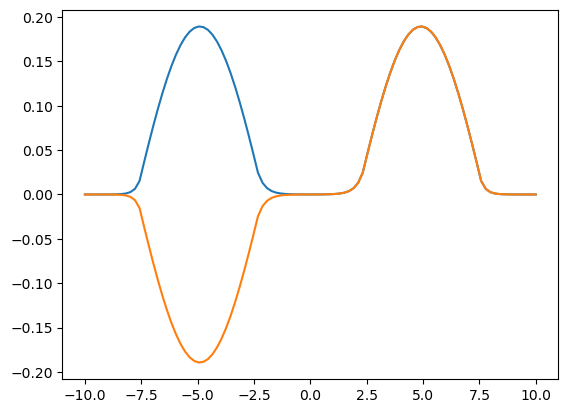

In [82]:
plt.plot (x_pos, dbw_eigvecs[:,0])
plt.plot (x_pos, dbw_eigvecs[:,1])


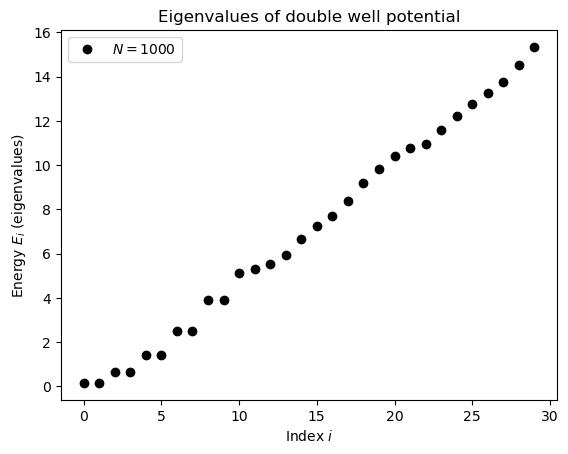

In [130]:
plt.plot(dbw_eigvals[:30], "ko", label = "$N = 1000$")
plt.xlabel(r"Index $i$")
plt.ylabel(r"Energy $E_i$ (eigenvalues)")
plt.title("Eigenvalues of double well potential")
plt.legend()
plt.savefig("Eigenvalues of double well potential.png")

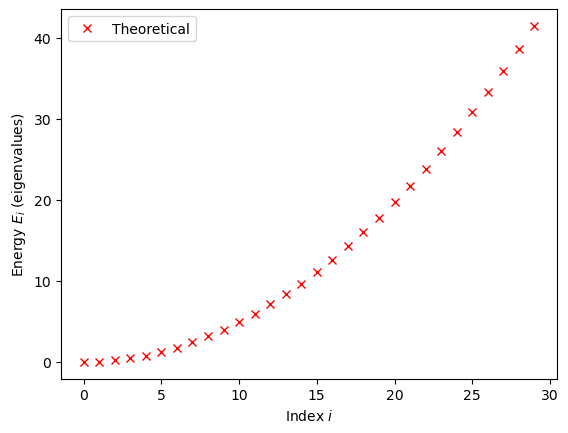

In [104]:

plt.xlabel(r"Index $i$")
plt.ylabel(r"Energy $E_i$ (eigenvalues)")
plt.legend()
plt.savefig("Theoretical eigenvalues of double well.png")